# MY FIRST ML PROJECT
## CLASSIFICATION OF BASEBALL PLAYER POSITIONS

All the best in this journey

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from category_encoders import OneHotEncoder, OrdinalEncoder

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import make_pipeline

Import dataset and convert to a dataframe

In [2]:
df = pd.read_csv("baseball.csv")
df.head()

,Name,Team,Position,Height,Weight,Age,PosCategory
0,Adam_Donachie,BAL,Catcher,74,180,22.99,Catcher
1,Paul_Bako,BAL,Catcher,74,215,34.69,Catcher
2,Ramon_Hernandez,BAL,Catcher,72,210,30.78,Catcher
3,Kevin_Millar,BAL,First_Baseman,72,210,35.43,Infielder
4,Chris_Gomez,BAL,First_Baseman,73,188,35.71,Infielder


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1015 entries, 0 to 1014
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         1015 non-null   object 
 1   Team         1015 non-null   object 
 2   Position     1015 non-null   object 
 3   Height       1015 non-null   int64  
 4   Weight       1015 non-null   int64  
 5   Age          1015 non-null   float64
 6   PosCategory  1015 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 55.6+ KB


In [4]:
df.shape

(1015, 7)

In [5]:
df.describe(include="all")

,Name,Team,Position,Height,Weight,Age,PosCategory
count,1015,1015,1015,1015.000000,1015.000000,1015.000000,1015
unique,1013,30,8,NaN,NaN,NaN,4
top,Tony_Pe?a,NYM,Relief_Pitcher,NaN,NaN,NaN,Pitcher
freq,2,38,315,NaN,NaN,NaN,535
mean,NaN,NaN,NaN,73.689655,201.348768,28.708355,NaN
std,NaN,NaN,NaN,2.313932,20.823115,4.314453,NaN
min,NaN,NaN,NaN,67.000000,150.000000,20.900000,NaN
25%,NaN,NaN,NaN,72.000000,186.000000,25.405000,NaN
50%,NaN,NaN,NaN,74.000000,200.000000,27.900000,NaN
75%,NaN,NaN,NaN,75.000000,215.000000,31.190000,NaN


c:\users\ajibola\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


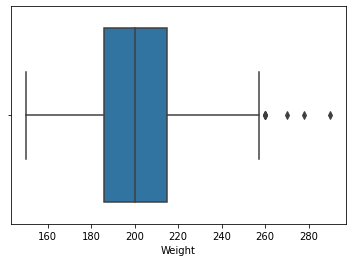

In [6]:
#sns.boxplot(df.Height);
sns.boxplot(df.Weight);
#sns.boxplot(df.Age);

In [7]:
players_greater_than_36 = df[df["Age"] > 36]

In [8]:
players_greater_than_36.describe()

,Height,Weight,Age
count,70.000000,70.000000,70.000000
mean,73.214286,205.400000,38.678429
std,2.212565,18.361428,2.278217
min,69.000000,163.000000,36.030000
25%,72.000000,190.000000,37.115000
50%,73.000000,205.000000,38.085000
75%,74.750000,220.000000,39.835000
max,82.000000,250.000000,48.520000


c:\users\ajibola\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


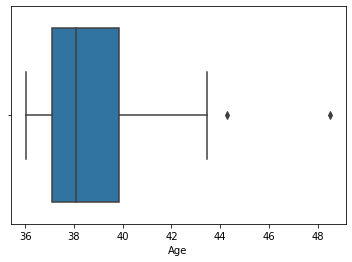

In [9]:
sns.boxplot(players_greater_than_36.Age);

# Data Preparation

In [10]:
def wrangle (path):
    df = pd.read_csv(path)
    
    # drop columns with multidimensionality
    drop_cols = ["Name", "Team"]
    
    df.drop(columns=drop_cols, inplace=True)
    
    return df

In [11]:
df = wrangle("baseball.csv")
print(df)

            Position  Height  Weight    Age PosCategory
0            Catcher      74     180  22.99     Catcher
1            Catcher      74     215  34.69     Catcher
2            Catcher      72     210  30.78     Catcher
3      First_Baseman      72     210  35.43   Infielder
4      First_Baseman      73     188  35.71   Infielder
...              ...     ...     ...    ...         ...
1010  Relief_Pitcher      73     190  25.08     Pitcher
1011  Relief_Pitcher      74     180  25.73     Pitcher
1012  Relief_Pitcher      75     205  25.19     Pitcher
1013  Relief_Pitcher      75     190  31.01     Pitcher
1014  Relief_Pitcher      73     195  27.92     Pitcher

[1015 rows x 5 columns]


In [12]:
corr = df.drop(columns="PosCategory").corr()

<AxesSubplot:>

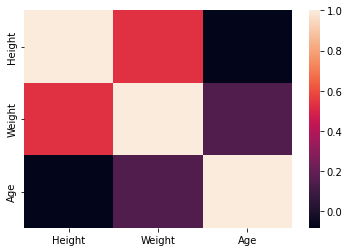

In [13]:
sns.heatmap(corr)

# Build a KNN model

In [14]:
target = "PosCategory"
X = df.drop(columns=target)
y = df[target]

print(X.shape)
print(y.shape)

(1015, 4)
(1015,)


- Split into training and testing set

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(609, 4)
(609,)
(203, 4)
(203,)
(203, 4)
(203,)


## Building Baseline

In [16]:
acc_baseline = y_train.value_counts(normalize=True).max()
print("The baseline accuracy = ", acc_baseline)

The baseline accuracy =  0.5270935960591133


# Finding the Optimal K

In [17]:
k_value = range(1, 50, 2)
acc_train = []
acc_val = []
for k in k_value:
    knn = make_pipeline(
        OrdinalEncoder(),
        KNeighborsClassifier(n_neighbors=k)
    )
    knn.fit(X_train, y_train)
    y_train_pred = knn.predict(X_train)
    Accuracy_train= accuracy_score(y_train, y_train_pred)
    acc_train.append(Accuracy_train.round(6))
    
    y_val_pred = knn.predict(X_val)
    Accuracy_val = accuracy_score(y_val, y_val_pred)
    acc_val.append(Accuracy_val.round(6))
    print("The accuracy of the KNN on train set with k = ", k , "is ", acc_train[len(acc_train) - 1], "and val set is ", acc_val[len(acc_val)-1])


The accuracy of the KNN on train set with k =  1 is  1.0 and val set is  0.665025
The accuracy of the KNN on train set with k =  3 is  0.80624 and val set is  0.600985
The accuracy of the KNN on train set with k =  5 is  0.752053 and val set is  0.600985
The accuracy of the KNN on train set with k =  7 is  0.691297 and val set is  0.581281
The accuracy of the KNN on train set with k =  9 is  0.671593 and val set is  0.576355
The accuracy of the KNN on train set with k =  11 is  0.646962 and val set is  0.581281
The accuracy of the KNN on train set with k =  13 is  0.632184 and val set is  0.586207
The accuracy of the KNN on train set with k =  15 is  0.640394 and val set is  0.596059
The accuracy of the KNN on train set with k =  17 is  0.633826 and val set is  0.615764
The accuracy of the KNN on train set with k =  19 is  0.623974 and val set is  0.596059
The accuracy of the KNN on train set with k =  21 is  0.614122 and val set is  0.600985
The accuracy of the KNN on train set with k

In [18]:
result = pd.DataFrame({"k": k_value, "acc_train": acc_train, "acc_val": acc_val})
result

,k,acc_train,acc_val
0,1,1.000000,0.665025
1,3,0.806240,0.600985
2,5,0.752053,0.600985
3,7,0.691297,0.581281
4,9,0.671593,0.576355
5,11,0.646962,0.581281
6,13,0.632184,0.586207
7,15,0.640394,0.596059
8,17,0.633826,0.615764
9,19,0.623974,0.596059


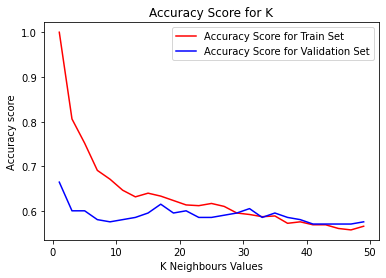

In [19]:
plt.plot(result.k, result.acc_train, color = "red", label="Accuracy Score for Train Set")
plt.plot(result.k, result.acc_val, color = "blue", label="Accuracy Score for Validation Set")
plt.title("Accuracy Score for K")
plt.xlabel("K Neighbours Values")
plt.ylabel("Accuracy score")
plt.legend();

In [20]:
knn_3 = make_pipeline(
    OrdinalEncoder(),
    KNeighborsClassifier(n_neighbors=3)
)

knn_3.fit(X_train, y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['Position'],
                                mapping=[{'col': 'Position',
                                          'data_type': dtype('O'),
                                          'mapping': Relief_Pitcher      1
Second_Baseman      2
Catcher             3
Outfielder          4
Starting_Pitcher    5
Shortstop           6
First_Baseman       7
Third_Baseman       8
NaN                -2
dtype: int64}])),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=3))])

In [21]:
y_train_pred = knn_3.predict(X_train)

In [22]:
train_df = pd.DataFrame({"y_train":y_train, "y_train_pred":y_train_pred}).reset_index(drop=True)
train_df

,y_train,y_train_pred
0,Pitcher,Pitcher
1,Pitcher,Pitcher
2,Infielder,Infielder
3,Catcher,Catcher
4,Outfielder,Outfielder
...,...,...
604,Outfielder,Outfielder
605,Pitcher,Pitcher
606,Infielder,Infielder
607,Infielder,Infielder


In [23]:
Accuracy = accuracy_score(y_train, y_train_pred)
print("The accuracy of the KNN on train set with k = 5 is ", Accuracy.round(7))

The accuracy of the KNN on train set with k = 5 is  0.8062397


In [24]:
y_val_pred = knn_3.predict(X_val)
Accuracy = accuracy_score(y_val, y_val_pred)
print("The accuracy of the KNN on the validation set with k = 5 is ", Accuracy.round(7))

The accuracy of the KNN on the validation set with k = 5 is  0.6009852


In [25]:
val_df = pd.DataFrame({"y_val":y_val, "y_val_pred":y_val_pred}).reset_index(drop=True)
val_df

,y_val,y_val_pred
0,Infielder,Infielder
1,Outfielder,Outfielder
2,Pitcher,Pitcher
3,Pitcher,Infielder
4,Infielder,Infielder
...,...,...
198,Pitcher,Pitcher
199,Pitcher,Pitcher
200,Pitcher,Catcher
201,Pitcher,Pitcher


In [26]:
y_test_pred = knn_3.predict(X_test)
Accuracy = accuracy_score(y_test, y_test_pred)
print("The accuracy of the KNN on the validation set with k = 5 is ", Accuracy.round(7))


The accuracy of the KNN on the validation set with k = 5 is  0.635468


In [27]:
test_df = pd.DataFrame({"y_test":y_test, "y_test_pred":y_test_pred}).reset_index(drop=True)
test_df

,y_test,y_test_pred
0,Infielder,Pitcher
1,Outfielder,Outfielder
2,Infielder,Catcher
3,Infielder,Infielder
4,Catcher,Catcher
...,...,...
198,Pitcher,Catcher
199,Outfielder,Pitcher
200,Infielder,Infielder
201,Pitcher,Pitcher


In [28]:
test_df.to_csv("Baseball Prediction.csv")

In [29]:
test_df.value_counts()

y_test      y_test_pred
Pitcher     Pitcher        77
Infielder   Infielder      24
Outfielder  Outfielder     19
Infielder   Pitcher        16
Pitcher     Outfielder     14
Outfielder  Pitcher        13
Catcher     Catcher         9
Pitcher     Catcher         7
Outfielder  Catcher         5
Infielder   Catcher         4
Outfielder  Infielder       4
Catcher     Outfielder      3
            Pitcher         3
Pitcher     Infielder       3
Infielder   Outfielder      2
dtype: int64

In [30]:
matrix =confusion_matrix(y_val, y_val_pred)
print(matrix)

[[ 2  2  4  7]
 [ 6 24  2  6]
 [ 5  2 16 14]
 [ 9 13 11 80]]


In [31]:
matrix_test =confusion_matrix(y_test, y_test_pred)
print(matrix_test)

[[ 9  0  3  3]
 [ 4 24  2 16]
 [ 5  4 19 13]
 [ 7  3 14 77]]


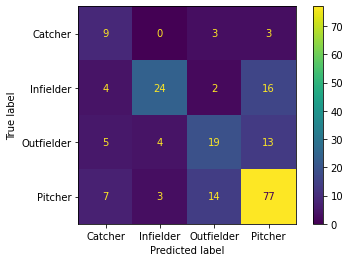

In [34]:
ConfusionMatrixDisplay.from_estimator(knn_3, X_test, y_test)